### Importing libraries

In [91]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading datasets

In [92]:
train = pd.read_csv(r"C:\Users\m1050816\Desktop\House Prices\train.csv")
test = pd.read_csv(r"C:\Users\m1050816\Desktop\House Prices\test.csv")

### Data description

In [93]:
print("The train dataset shape : ",train.shape)
print("The test dataset shape : ",test.shape)

The train dataset shape :  (1460, 81)
The test dataset shape :  (1459, 80)


In [94]:
train.head() # There are 81 columns present in train dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe() # Out of the 81 columns, 38 columns are numerical and remaining 43 are categorical in nature

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test.describe() # One less numerical column because the dependent variable SalePrice is to be predicted and not present in test dataset

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Data preparation

In [7]:
train_ID = train['Id']
test_ID = test['Id']

In [8]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [14]:
print("Train shape: ",train.shape)
print("Test shape  :",test.shape)

Train shape:  (1460, 80)
Test shape  : (1459, 79)


In [29]:
categorical = len(train.select_dtypes(include=['object']).columns)
numerical = len(train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', categorical + numerical)
print('Categorical features: ', categorical)
print('numerical features: ', numerical)

Total Features:  80
Categorical features:  43
numerical features:  37


In [30]:
train.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [31]:
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


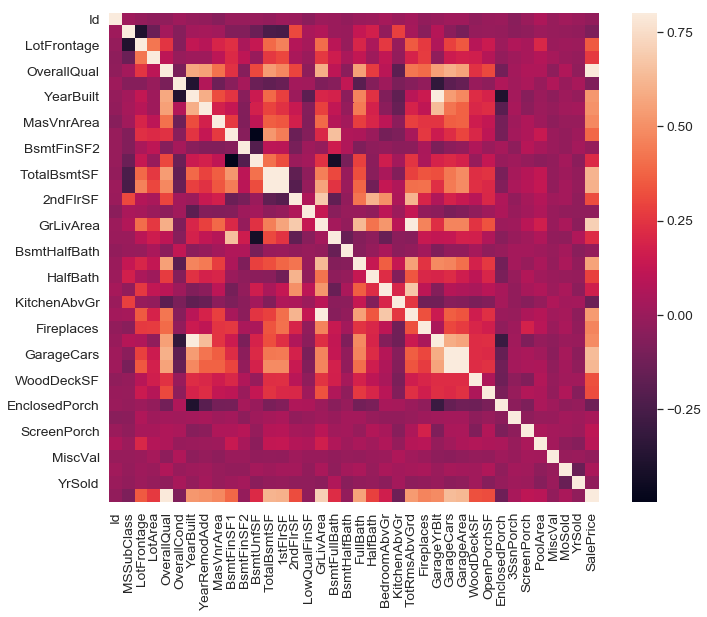

In [95]:
correlation_mat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_mat, vmax=.8, square=True);
correlation_mat

In [36]:
k = 10 #number of variables for heatmap
cols = correlation_mat.nlargest(k, 'SalePrice')['SalePrice'].index
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


### Impute Missing Data

In [47]:
combine_data = pd.concat([train, test])

C:\Users\m1050816\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [48]:
combine_data.shape

(2919, 80)

In [49]:
top_null_columns = combine_data.isnull().sum() / combine_data.shape[0] * 100
# top_null_columns.values > 20
deleted_null_columns = top_null_columns[top_null_columns.values > 20].keys()
deleted_null_columns

Index(['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC', 'SalePrice'], dtype='object')

In [50]:
af_del_combine = combine_data.drop(deleted_null_columns, axis='columns')
af_del_combine.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


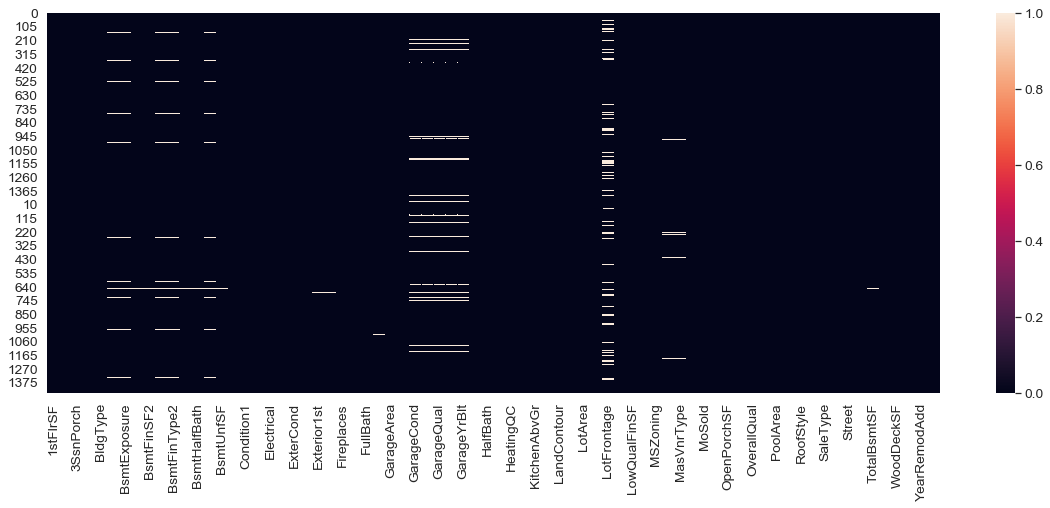

In [51]:
plt.figure(figsize=(20, 7))
sns.heatmap(af_del_combine.isnull())

### Numerical Imputation

In [52]:
numeric_data = af_del_combine.select_dtypes(['int64', 'float64'])
numeric_data_columns = numeric_data.columns
numeric_data_columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [53]:
numeric_null =  numeric_data.isnull().sum()
numeric_null_collumns = numeric_null[numeric_null.values > 0].keys()
numeric_null_collumns

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea',
       'TotalBsmtSF'],
      dtype='object')

In [54]:
numeric_null

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
BedroomAbvGr       0
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
EnclosedPorch      0
Fireplaces         0
FullBath           0
GarageArea         1
GarageCars         1
GarageYrBlt      159
GrLivArea          0
HalfBath           0
KitchenAbvGr       0
LotArea            0
LotFrontage      486
LowQualFinSF       0
MSSubClass         0
MasVnrArea        23
MiscVal            0
MoSold             0
OpenPorchSF        0
OverallCond        0
OverallQual        0
PoolArea           0
ScreenPorch        0
TotRmsAbvGrd       0
TotalBsmtSF        1
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
dtype: int64

In [55]:
numeric_fill_data_mean = numeric_data.fillna(numeric_data.mean())

In [56]:
numeric_fill_data_mean.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtHalfBath     0
BsmtUnfSF        0
EnclosedPorch    0
Fireplaces       0
FullBath         0
GarageArea       0
GarageCars       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
KitchenAbvGr     0
LotArea          0
LotFrontage      0
LowQualFinSF     0
MSSubClass       0
MasVnrArea       0
MiscVal          0
MoSold           0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PoolArea         0
ScreenPorch      0
TotRmsAbvGrd     0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
YrSold           0
dtype: int64

### Categorical Imputation

In [57]:
categorical_data = af_del_combine.select_dtypes(['O'])
categorical_data.head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,...,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,...,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,...,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [58]:
cat_null_col = categorical_data.isnull().sum()
cat_null_col = cat_null_col[cat_null_col.values > 0].keys()
cat_null_col

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'KitchenQual', 'MSZoning',
       'MasVnrType', 'SaleType', 'Utilities'],
      dtype='object')

In [59]:
categorical_data[categorical_data[cat_null_col].isnull().any(axis=1)].head()


,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,...,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
17,Duplex,NaN,NaN,NaN,NaN,NaN,Y,Norm,Norm,SBrkr,...,RL,None,Sawyer,Y,CompShg,Gable,Normal,WD,Pave,AllPub
39,Duplex,NaN,NaN,NaN,NaN,NaN,N,Norm,Norm,FuseP,...,RL,None,Edwards,N,CompShg,Gable,AdjLand,WD,Pave,AllPub
48,2fmCon,TA,No,Unf,Unf,TA,Y,Norm,Norm,SBrkr,...,RM,None,OldTown,N,CompShg,Gable,Partial,New,Pave,AllPub
78,Duplex,TA,No,Unf,Unf,TA,N,Norm,Norm,SBrkr,...,RL,None,Sawyer,Y,CompShg,Hip,Normal,WD,Pave,AllPub
88,1Fam,Fa,No,Unf,Unf,TA,N,Feedr,Feedr,SBrkr,...,C (all),None,IDOTRR,N,CompShg,Hip,Abnorml,ConLD,Pave,AllPub


In [61]:
categorical_fill_data_mode = categorical_data.copy()
categorical_fill_data_mode.head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,...,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,...,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,...,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [62]:
for column in cat_null_col:
    print(column, categorical_data[column].mode()[0])
    categorical_fill_data_mode[column] = categorical_data[column].fillna(categorical_data[column].mode()[0])

BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
BsmtQual TA
Electrical SBrkr
Exterior1st VinylSd
Exterior2nd VinylSd
Functional Typ
GarageCond TA
GarageFinish Unf
GarageQual TA
GarageType Attchd
KitchenQual TA
MSZoning RL
MasVnrType None
SaleType WD
Utilities AllPub


In [63]:
categorical_fill_data_mode.isnull().sum()

BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtQual         0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
MasVnrType       0
Neighborhood     0
PavedDrive       0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
Street           0
Utilities        0
dtype: int64

In [65]:
combine_fill_data = pd.concat([numeric_fill_data_mean, categorical_fill_data_mode], axis=1, sort=False)
combine_fill_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [66]:
combine_fill_data.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtHalfBath     0
BsmtUnfSF        0
EnclosedPorch    0
Fireplaces       0
FullBath         0
GarageArea       0
GarageCars       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
KitchenAbvGr     0
LotArea          0
LotFrontage      0
LowQualFinSF     0
MSSubClass       0
MasVnrArea       0
MiscVal          0
MoSold           0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PoolArea         0
ScreenPorch      0
                ..
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
MasVnrType  

### One hot encoding for categorical data

In [67]:
categorical_columns = categorical_data.columns
categorical_columns

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType',
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [69]:
ordinal_cat_columns = ['KitchenQual', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'GarageQual', 'GarageCond']
nominal_cat_columns = ['BldgType',
 'Condition1',
 'Condition2',
 'Exterior1st',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'SaleCondition',
 'RoofMatl',
 'SaleType',
 'MasVnrType',
 'LandSlope',
 'LotShape',
 'PavedDrive',
 'Utilities',
 'Heating',
 'Functional',
 'LandContour',
 'LotConfig',
 'Exterior2nd',
 'Neighborhood',
 'HouseStyle',
 'Street',
 'MSZoning',
 'Foundation',
 'RoofStyle',
 'CentralAir'
]

In [70]:
print(len(nominal_cat_columns))
print(len(ordinal_cat_columns))

27
11


In [71]:
combine_fill_data['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [72]:
combine_map_data = combine_fill_data.copy()

In [73]:
KitchenQual_map = {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1}
ExterQual_map = {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1}
ExterCond_map = {'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5}
BsmtQual_map = {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1}
BsmtCond_map = {'TA':3, 'Gd':4, 'Fa':2, 'Po':1}
BsmtExposure_map = {'No': 1, 'Gd': 4, 'Mn': 2, 'Av': 3}
BsmtFinType1_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf':1}
BsmtFinType2_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf':1} 
HeatingQC_map = {'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5}
GarageQual_map = {'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5}
GarageCond_map = {'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5}

In [74]:
combine_map_data['KitchenQual'] = combine_fill_data['KitchenQual'].map(KitchenQual_map)
combine_map_data['ExterQual'] = combine_fill_data['ExterQual'].map(ExterQual_map)
combine_map_data['ExterCond'] = combine_fill_data['ExterCond'].map(ExterCond_map)
combine_map_data['BsmtQual'] = combine_fill_data['BsmtQual'].map(BsmtQual_map)
combine_map_data['BsmtCond'] = combine_fill_data['BsmtCond'].map(BsmtCond_map)
combine_map_data['BsmtExposure'] = combine_fill_data['BsmtExposure'].map(BsmtExposure_map)
combine_map_data['BsmtFinType1'] = combine_fill_data['BsmtFinType1'].map(BsmtFinType1_map)
combine_map_data['BsmtFinType2'] = combine_fill_data['BsmtFinType2'].map(BsmtFinType2_map)
combine_map_data['HeatingQC'] = combine_fill_data['HeatingQC'].map(HeatingQC_map)
combine_map_data['GarageQual'] = combine_fill_data['GarageQual'].map(GarageQual_map)
combine_map_data['GarageCond'] = combine_fill_data['GarageCond'].map(GarageCond_map)

In [75]:
combine_map_data['GarageCond']

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
       ..
1429    3
1430    3
1431    3
1432    3
1433    3
1434    3
1435    3
1436    3
1437    3
1438    3
1439    3
1440    3
1441    3
1442    3
1443    3
1444    3
1445    3
1446    3
1447    3
1448    3
1449    3
1450    2
1451    3
1452    3
1453    3
1454    3
1455    3
1456    3
1457    3
1458    3
Name: GarageCond, Length: 2919, dtype: int64

In [76]:
combine_map_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [77]:
combine_dummy_data = pd.get_dummies(combine_map_data, drop_first=True)
combine_dummy_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,0,1,1,0


In [96]:
#combine_dummy_data[combine_dummy_data['CentralAir_Y'] == 0].head()

### Scaling

In [81]:
from sklearn.preprocessing import RobustScaler
saleprice = np.log(train['SalePrice']+1)
saleprice

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

In [82]:
robust = RobustScaler()
robust.fit(combine_dummy_data)
combine_scale_data = robust.transform(combine_dummy_data)

In [83]:
combine_scale_data[:100]

array([[-0.44183773,  1.21306818,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35190616,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.31671554,  1.23011364,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.23851417,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.48289345,  0.        ,  0.        , ..., -1.        ,
         0.        ,  0.        ],
       [ 0.27956989,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [85]:
combine_column_scale_data = pd.DataFrame(combine_scale_data, columns=combine_dummy_data.columns)
combine_column_scale_data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,-0.441838,1.213068,0.0,0.0,0.459754,0.0,1.0,0.0,-0.541880,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.351906,0.000000,0.0,0.0,0.830832,0.0,0.0,1.0,-0.312821,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.316716,1.230114,0.0,0.0,0.159618,0.0,1.0,0.0,-0.056410,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.236559,1.073864,0.0,0.0,-0.208731,0.0,1.0,0.0,0.124786,272.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.123167,1.495739,0.0,1.0,0.390177,0.0,1.0,0.0,0.039316,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.559140,0.803977,320.0,-2.0,0.495225,0.0,1.0,0.0,-0.688889,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.196481,0.000000,0.0,0.0,1.364256,0.0,1.0,0.0,-0.256410,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.048876,1.396307,0.0,0.0,0.668486,32.0,1.0,0.0,-0.429060,228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.117302,1.068182,0.0,-1.0,-0.503411,0.0,0.0,0.0,0.829060,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.009775,0.000000,0.0,-1.0,0.657572,0.0,1.0,0.0,-0.558974,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Random Forest Algorithm

In [86]:
train_len = len(train)
train_len

1460

In [87]:
X_train = combine_scale_data[:train_len]
X_test = combine_scale_data[train_len:]
y_train = saleprice

In [88]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score


In [89]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[0.8572385554398209]

In [99]:
#rf_reg.fit(X_train,y_train)
#rf_reg.score(X_train,y_train)